# I. Data Wrangling

## I-A. Connecting Data

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olist = sqlite3.connect('olist.db')

## 1-B. Order Items Dataset

In [2]:
df_order_items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', olist)

In [3]:
df_order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## I-C. Products Dataset

In [4]:
df_products = pd.read_sql_query('SELECT * FROM olist_products_dataset', olist)

## I-D. Translate Product Category Name

In [5]:
#import the translation
df_translations = pd.read_sql_query("SELECT * FROM product_category_name_translation", olist)
df_translations.drop('index', axis=1, inplace=True)

#make it dictionary
dict_products_en = dict([(i,[x]) for i, x in zip(df_translations.product_category_name, df_translations.product_category_name_english)])

#apply the translation
df_products["product_category_name"] = df_products["product_category_name"].replace(dict_products_en)

In [6]:
df_products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## 1-E. Merging Order Items and Products Dataframe

In [7]:
ordered_products = pd.merge(df_order_items, df_products, on = "product_id", how = "left")

In [8]:
ordered_products.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


# II. Data Cleaning

## II-A. Overall data check

In [9]:
ordered_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index_x                     112650 non-null  int64  
 1   order_id                    112650 non-null  object 
 2   order_item_id               112650 non-null  int64  
 3   product_id                  112650 non-null  object 
 4   seller_id                   112650 non-null  object 
 5   shipping_limit_date         112650 non-null  object 
 6   price                       112650 non-null  float64
 7   freight_value               112650 non-null  float64
 8   index_y                     112650 non-null  int64  
 9   product_category_name       111047 non-null  object 
 10  product_name_lenght         111047 non-null  float64
 11  product_description_lenght  111047 non-null  float64
 12  product_photos_qty          111047 non-null  float64
 13  product_weight

## II-B. Check for duplicated data

In [10]:
ordered_products.duplicated().sum()

0

In [11]:
pd.value_counts(ordered_products['order_id'])

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

Results: No row is duplicated.

However some values in order_id show up more than once since there is a possibility that in a single order there are more than one item ordered (whether same items or various items). Every row that has the same order_id value will have different value in either order_item_id or product_id or both.

Since the objective is to find the most ordered product category and not the category with the most item sold, then we will treat each product category as only ordered once in every distinct order_id, no matter how many of that product was actually ordered in the transaction.

## II-C Check for inconsistent format

### Look at first 20 rows

In [27]:
ordered_products.head(20)

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,3939,housewares,36.0,558.0,1.0,450.0,24.0,8.0,15.0
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,22292,telephony,52.0,815.0,1.0,200.0,27.0,5.0,20.0
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,6974,garden_tools,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,2713,health_beauty,59.0,493.0,1.0,2000.0,30.0,12.0,16.0
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,28255,books_technical,52.0,1192.0,1.0,850.0,29.0,3.0,21.0


### Look at last 10 rows

In [28]:
ordered_products.tail(20)

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
112630,112630,fff6889749958e42b47a7977a4cf0ea0,1,75f6a4f019ec1322758d53b2fee2cc12,058cb5aeb36d7c0fcae20fc85d5e0a59,2017-10-01 22:56:15,92.00,31.60,9654,luggage_accessories,41.0,155.0,3.0,16050.0,60.0,40.0,40.0
112631,112631,fff6b8ca971f8e3ec822e99d0f2d3d21,1,9afaad66aca8b0c79e4f084a89c9c92b,42bde9fef835393bb8a8849cb6b7f245,2017-09-21 12:04:29,199.00,16.83,15041,telephony,44.0,965.0,3.0,150.0,20.0,7.0,14.0
112632,112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91,7898,watches_gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112633,112633,fff8286f77788ab8b55b2e5747fa7dd8,1,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,2018-07-05 22:31:13,24.99,15.28,15291,telephony,57.0,777.0,5.0,350.0,17.0,4.0,12.0
112634,112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,15932,computers_accessories,53.0,871.0,4.0,175.0,20.0,20.0,20.0
112635,112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,15932,computers_accessories,53.0,871.0,4.0,175.0,20.0,20.0,20.0
112636,112636,fff90cdcb3b2e6cfb397d05d562fd3fe,1,764292b2b0f73f77a0272be03fdd45f3,bd23da7354813347129d751591d1a6e2,2017-11-30 10:11:28,89.90,11.83,21629,furniture_decor,56.0,701.0,5.0,750.0,30.0,30.0,11.0
112637,112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02,28548,sports_leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0
112638,112638,fffb0b1a50e65c449020434fa835e078,1,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96,14710,musical_instruments,41.0,103.0,1.0,100.0,60.0,16.0,11.0
112639,112639,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,29540,bed_bath_table,50.0,696.0,2.0,200.0,25.0,5.0,18.0


Results: After checking with info(), value_counts(), head(), and tail(). No inconsistent format in any columns. But shipping_limit_date column should be in date type. Yet because we will not use it in this objective, we will leave it as it is.

## II-D. Check for missing data / value

### Check the amount of missing value

In [14]:
ordered_products.isna().sum()

index_x                          0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
index_y                          0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

Since we cannot just assign a value to product_category_name, then we will drop the row where it contains missing value of product_category_name

### Make a copy of the dataframe

Before we make an edit, it's suggested to make a copy

In [15]:
ordered_products_handled = ordered_products.copy()

### Cleaning row containing missing product_category_name value

In [16]:
ordered_products_handled.dropna(subset = "product_category_name", inplace = True)

Rechecking the missing value 

In [17]:
ordered_products_handled.isna().sum()

index_x                       0
order_id                      0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
index_y                       0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

### Drop columns containing missing values

Since we will not use data from product_weight_g, product_length_cm, product_height_cm, and product_width_cm, they are safe to be dropped 

In [18]:
ordered_products_handled.drop(["product_weight_g", "product_height_cm", "product_width_cm", "product_length_cm"], axis = 1, inplace = True)

Rechecking the missing value 

In [19]:
ordered_products_handled.isna().sum()

index_x                       0
order_id                      0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
index_y                       0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
dtype: int64

Missing values are successfully handled

## II-E. Check for outlier data

For this objective, we only need order_id and product_category_name. With the results above, there are not any outlier to be cleaned.

# III. Data Manipulation

## III-A. Groping the dataframe

We need to group the dataframe by product_category_name. The value will be the count of distinct order_id. As described in II-B section, we will treat each product category as only ordered once in every distinct order_id, no matter how many of that product was actually ordered in the transaction.

Since the objective is to find the most ordered product category, we will sort the grouped dataframe in descending order.

In [20]:
ordered_products_handled = ordered_products_handled.groupby("product_category_name").agg({"order_id" : pd.Series.nunique}).sort_values(["order_id"], ascending=False)

To make it easier to plot, we will reset the index

In [21]:
ordered_products_handled = ordered_products_handled.reset_index()

Change aggregated order_id column name to total_order to avoid confusion

In [22]:
ordered_products_handled.rename(columns={"order_id": "total_order"}, inplace = True)

In [23]:
ordered_products_handled.head(20)

,product_category_name,total_order
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


In [24]:
len(ordered_products_handled)

73

## III-B. Cutting the dataframe

With 73 existing product categories, displaying top 10% (7 or 8) ordered product category is representative enough

In [29]:
ordered_products_plot = ordered_products_handled.head(8)

In [30]:
ordered_products_plot.head(8)

,product_category_name,total_order
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199


# IV. Data Plotting

Text(0.5, 1.0, 'Most Ordered Product Categories')

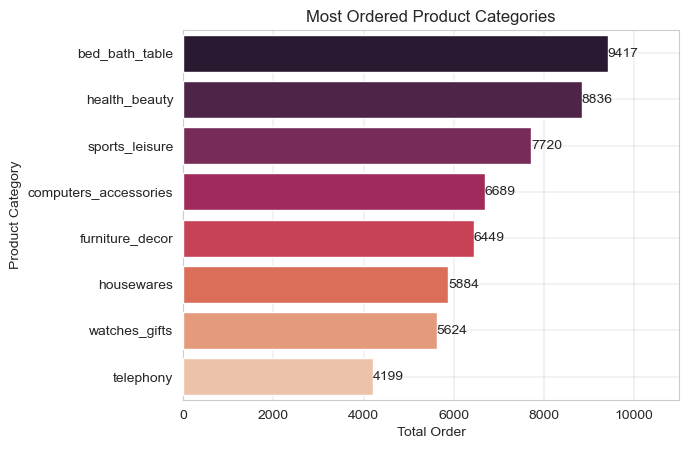

In [26]:
sns.set_style("whitegrid")

ax = sns.barplot(data = ordered_products_plot, y="product_category_name", x="total_order", zorder = 3, palette = "rocket")
plt.xlabel("Total Order")
plt.ylabel("Product Category")
plt.grid(visible = True, linestyle = '--', linewidth = 0.1, color = "black", zorder = 0)
plt.xlim(0, 11000)


ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set_title('Most Ordered Product Categories')